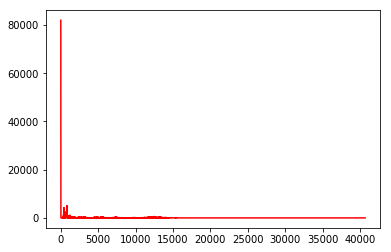

In [21]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read('J10.wav') # load the data

a = data.T[0] # this is a two channel soundtrack, I get the first track

b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)

c = fft(b) # calculate fourier transform (complex numbers list)

d = len(c)//2  # you only need half of the fft list (real signal symmetry)

plt.plot(abs(c[:(d-1)]),'r') 
plt.show()

  

Frequency sampling 44100
Channels 2
Complete Samplings N 113920
secs 2.583219954648526
Timestep between samples Ts 2.2675736961451248e-05


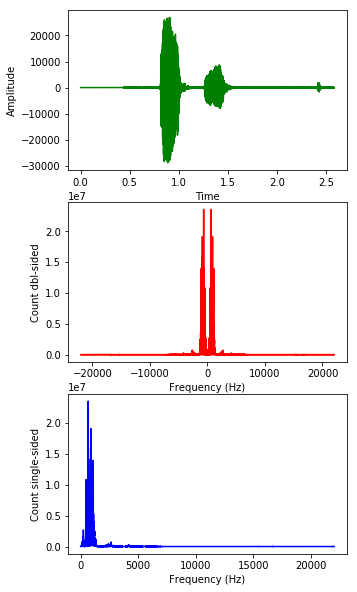

In [2]:
from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
import numpy as np
from matplotlib import pyplot as plt

fs_rate, signal = wavfile.read("G1.wav")
print ("Frequency sampling", fs_rate)
l_audio = len(signal.shape)
print ("Channels", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0]
print ("Complete Samplings N", N)
secs = N / float(fs_rate)
print ("secs", secs)
Ts = 1.0/fs_rate # sampling interval in time
print ("Timestep between samples Ts", Ts)
t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
FFT = abs(scipy.fft(signal))
FFT_side = FFT[range(N//2)] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(N//2)] # one side frequency range
fft_freqs_side = np.array(freqs_side)
plt.figure(figsize= (5, 10))
plt.subplot(311)
p1 = plt.plot(t, signal, "g") # plotting the signal
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(312)
p2 = plt.plot(freqs, FFT, "r") # plotting the complete fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count dbl-sided')
plt.subplot(313)
p3 = plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()